## Lead Case Study

### Problem Statement 

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 
### GOALS
There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.


### Importing the required Libraries.

In [1]:
#Importing all important important libraries to be used for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Setting pandas option to display many rows and columns, set columns width, max rows, max columns and max info
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_info_columns', 1000)
pd.set_option('display.max_colwidth',1000)
#Supreccing warning for deprecated python libraries 
import warnings
warnings.filterwarnings("ignore")
#import missingno to help is visualize missing values 
import missingno as msno

#imoprting sklearn libraries
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score
# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve


%matplotlib inline

# Libraries to tune model, get different metric scores, and split data

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


C:\Users\admin\AppData\Roaming\Python\Python36\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importing data 



In [2]:
#Loading data dictionary and dropping NAN values , uxse Unnamed:1 as index 
data_dictionary = pd.read_excel('Leads Data Dictionary.xlsx',index_col="Unnamed: 1", keep_default_na=False)

In [3]:
#read data dictionary 
data_dictionary

,Unnamed: 0,Unnamed: 2
,,
Variables,,Description
Prospect ID,,A unique ID with which the customer is identified.
Lead Number,,A lead number assigned to each lead procured.
Lead Origin,,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
Lead Source,,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
Do Not Email,,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
Do Not Call,,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
Converted,,The target variable. Indicates whether a lead has been successfully converted or not.
TotalVisits,,The total number of visits made by the customer on the website.


In [4]:
df = pd.read_csv('Leads.csv')

In [5]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
df.shape

(9240, 37)

In [7]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
#Checking for missing values counts
pd.DataFrame((df.isnull().sum())/len(df),columns =['val1']).sort_values(by ='val1', ascending=False)

,val1
Lead Quality,0.515909
Asymmetrique Activity Index,0.456494
Asymmetrique Profile Score,0.456494
Asymmetrique Activity Score,0.456494
Asymmetrique Profile Index,0.456494
Tags,0.362879
Lead Profile,0.293182
What matters most to you in choosing a course,0.293182
What is your current occupation,0.291126
Country,0.266342


Observation:
* We note that All the four Asymmetrtrie Features have a higher rate for missing values, their missing values are  greater than the 20% threshhold. 
* we will proceed to drop these features

### Check Missing Data Patterns

In [10]:
#importing the missing data library
import missingno as mso

<AxesSubplot:>

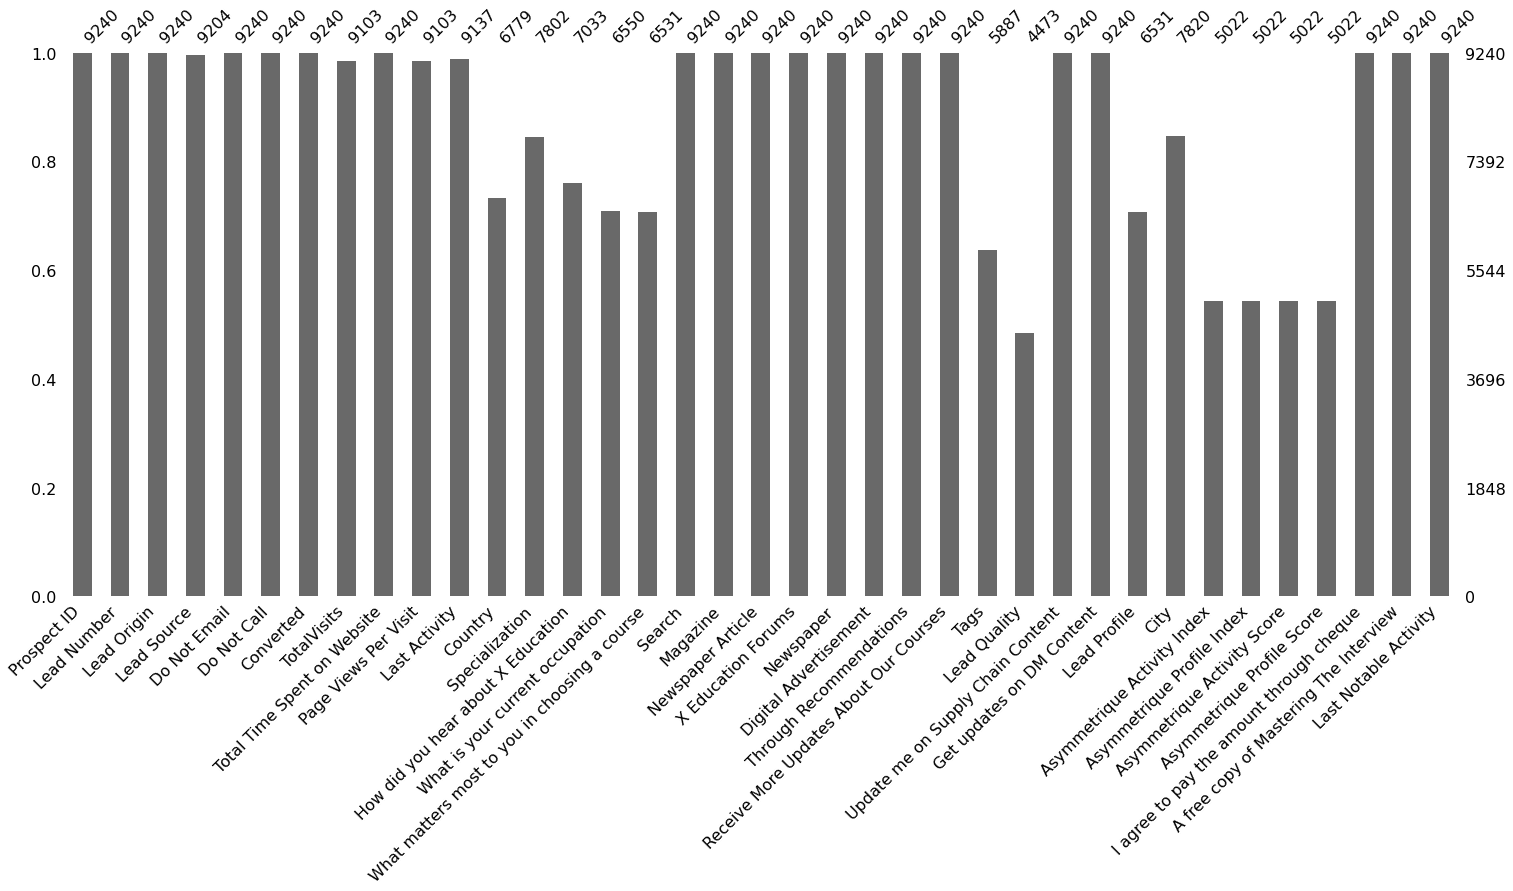

In [11]:
#dispplay missing featires via a bar plot 
mso.bar(df)

<AxesSubplot:>

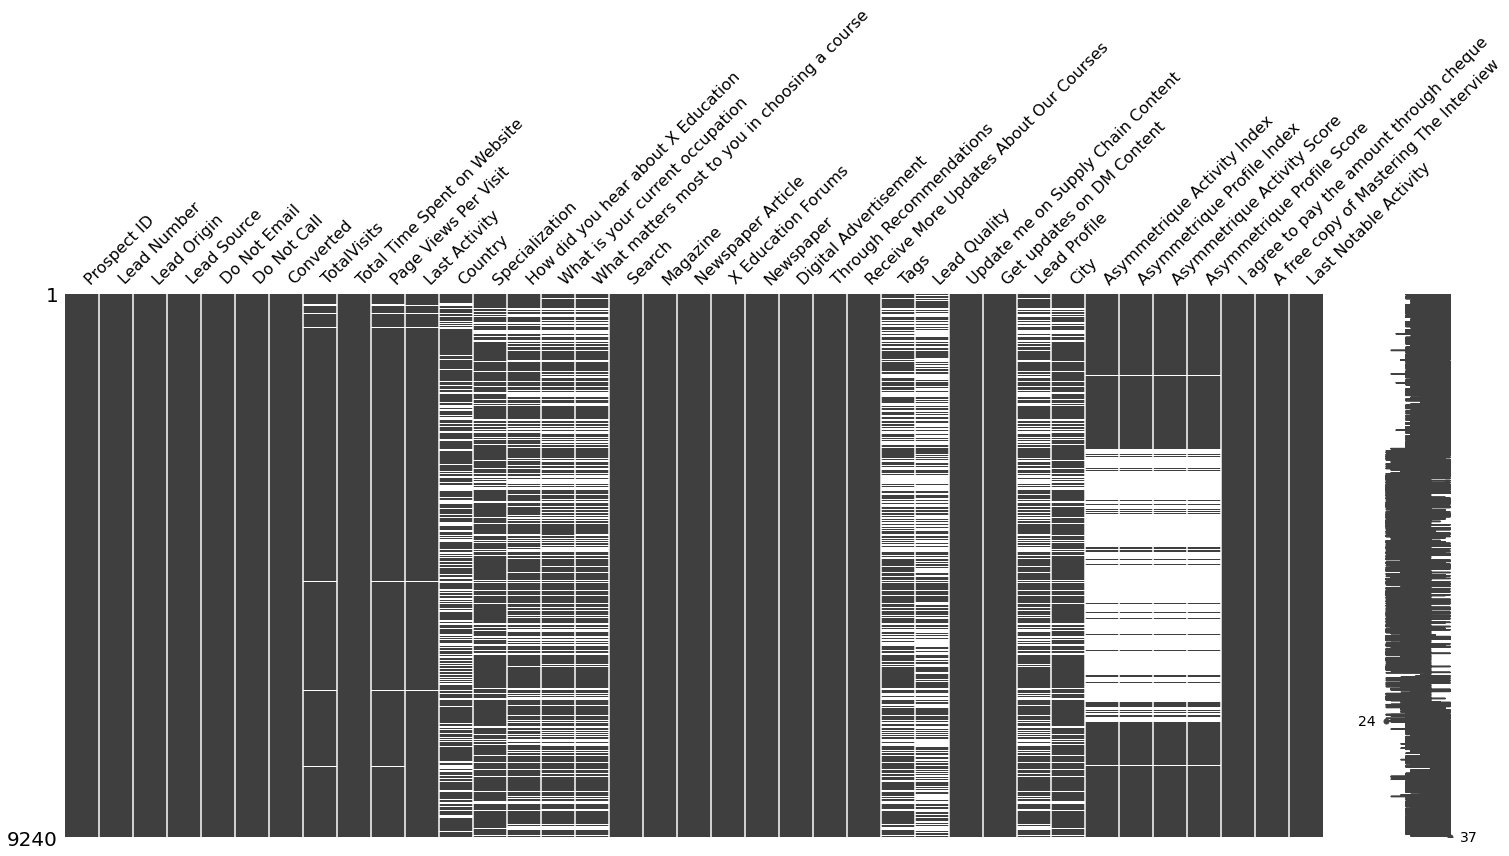

In [12]:
mso.matrix(df)

Observation:
1. We note that All the four Asymmetrtrie Features share the same pattern re missing values, their missing values are  greater than the 30% threshhold. 
* we will explore whether to drop these features or continue to imput should they not introduce data noise.
2. We also notice that the features " what isyour current occupation" & " What matters most in choosing a course" show similar missing value patterns but with a low ratio of about 20%.
* we will explore these further to gain more insights 

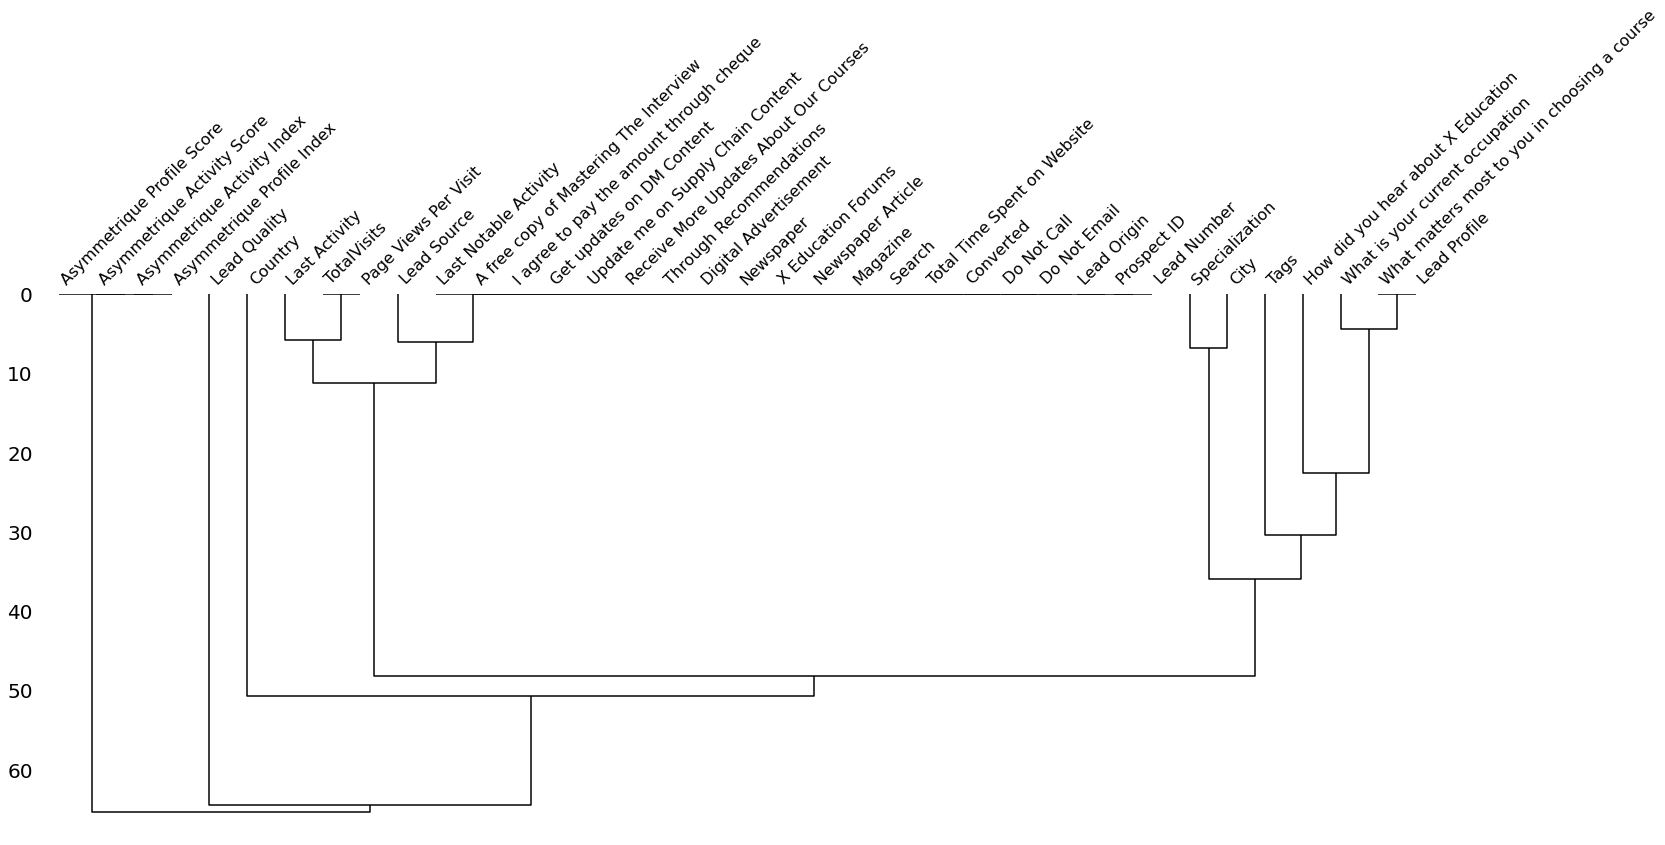

In [13]:
#drawing the missing values clusters voa dendogram
mso.dendrogram(df)
plt.show()

* As expected the Asymmetrique features belong to one missing value cluster


### Check Duplicates 

In [14]:
#Checking for duplicate values 
df.duplicated().sum()
#Accoring to the sum of zero we do not have duplicate values 

0

In [15]:
#decribing all values commented 
#df.describe(include="all").T
#df.describe().T

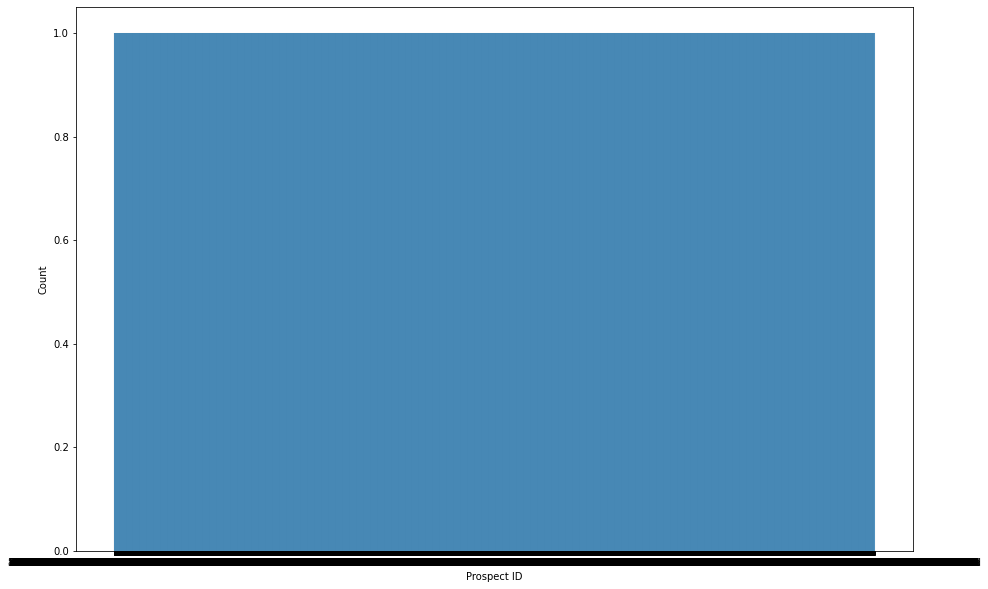

In [16]:
#plotting the distribution of the prospect ID
plt.figure(figsize=(15,10))
sns.histplot(df["Prospect ID"])
plt.show()
#As expected it ew get a uniform distribution since this is meant for identification.
#We proceed to drop this column as no further stats analysis can be derived from this columns

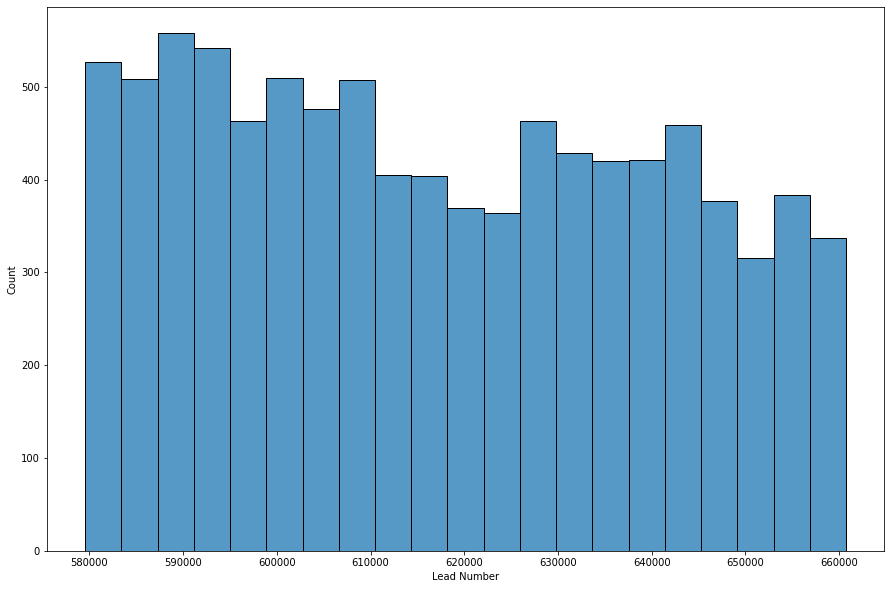

In [17]:
#plotting the distribution of the lead number 
plt.figure(figsize=(15,10))
sns.histplot(df["Lead Number"])
plt.show()


In [18]:
#checking unique values for leadmNumber
df["Lead Number"].nunique()

9240

Observation:
* we observe  variability acrosss. will proceed to do further analysis re this field

## Data Preprocessing

### Checking distribution of binary features 



In [19]:
#Checking DO not Email
df['Do Not Email'].value_counts(normalize=True, ascending=False)*100
#92% of customers prefer to be emailed 

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

In [20]:
#checking do not call 
df['Do Not Call'].value_counts(normalize=True, ascending=False)*100
#We can drop this feature since 99% of the population opted not to be called

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

In [21]:
#Checking Search
df['Search'].value_counts(normalize=True, ascending=False)*100
#99% of customers do not discover us via search. We proceed to drop this feature

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [22]:
#Checking Magazine
df['Magazine'].value_counts(normalize=True, ascending=False)*100
#100% of customers do not discover us via this channel. We proceed to drop this feature

No    100.0
Name: Magazine, dtype: float64

In [23]:
#Checking newspaper article
df['Newspaper Article'].value_counts(normalize=True, ascending=False)*100
#99% of customers do not discover us via this channel. We proceed to drop this feature

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [24]:
#Checking Newspaper
df['Newspaper'].value_counts(normalize=True, ascending=False)*100
#99% of customers do not discover us via this channel. We proceed to drop this feature

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [25]:
#Checking Education Forums
df['X Education Forums'].value_counts(normalize=True, ascending=False)*100
#99% of customers do not discover us via this channel. We proceed to drop this feature

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [26]:
#Checking Digital ads
df['Digital Advertisement'].value_counts(normalize=True, ascending=False)*100
#99% of customers do not discover us via this channel. We proceed to drop this feature

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [27]:
#Checking via Recommendations
df['Through Recommendations'].value_counts(normalize=True, ascending=False)*100
#99% of customers do not discover us via this channel. We proceed to drop this feature

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

In [28]:
#Checking those opting to further recieve updated about the course
df['Receive More Updates About Our Courses'].value_counts(normalize=True, ascending=False)*100
#100% of customers do not discover us via this channel. We proceed to drop this feature

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [29]:
#Checking those that request to get chain content
df['Update me on Supply Chain Content'].value_counts(normalize=True, ascending=False)*100
#100% of customers do not discover us via this channel. We proceed to drop this feature

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [30]:
#Checking those opting to get DM content 
df['Get updates on DM Content'].value_counts(normalize=True, ascending=False)*100
#100% of customers do not discover us via this channel. We proceed to drop this feature

No    100.0
Name: Get updates on DM Content, dtype: float64

In [31]:
#Checking those agree to pay via cheque
df['I agree to pay the amount through cheque'].value_counts(normalize=True, ascending=False)*100
#100% of customers do not want to pay via this channel. We proceed to drop this feature

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [32]:
#Checking asking to get a free master the interview
df['A free copy of Mastering The Interview'].value_counts(normalize=True, ascending=False)*100
#68% said no while the rest said yes - we keep this for further analysis

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

In [33]:
#Checking asking to get a free master the interview
#df['Asymmetrique Activity Score'].value_counts(normalize=True, ascending=False)*100
#68% said no while the rest said yes - we keep this for further analysis

### Droping Features


In [34]:
#We will continue to drop these features since distribution is baised one way
df.drop(columns=['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content',
                'Update me on Supply Chain Content','Through Recommendations','Digital Advertisement','X Education Forums',
                'Newspaper','Newspaper Article','Magazine','Search','Do Not Call','Do Not Email','Prospect ID',
                'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 
                 'Asymmetrique Profile Score','Receive More Updates About Our Courses'],axis=1, inplace=True)
df.shape

(9240, 19)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   Last Activity                                  9137 non-null   object 
 8   Country                                        6779 non-null   object 
 9   Specialization                                 7802 

### Data Imbalance Ratio:

In [36]:
#Checking Converted
df['Converted'].value_counts(normalize=True, ascending=False)*100
#100% of customers do not discover us via this channel. We proceed to drop this feature

0    61.461039
1    38.538961
Name: Converted, dtype: float64

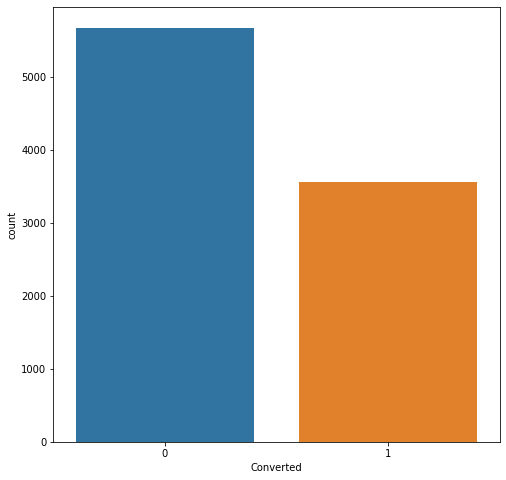

In [37]:
#plotting the distribution of the lead number 
plt.figure(figsize=(8,8))
sns.countplot(df['Converted']  )
plt.show()

Observation
* We observe that 61.46% was not converted while 38.54% was converted 
* With this being the targeted feature the population split is thus 38% conversion and 61% no conversion
* thus it can be said that data is fairly balance with a ration of 2:1

## EDA



#### Utility Function Definition

In [38]:
# Accepts numerical column as the input and returns the boxplots  and histogram visualization


def box_hist(feature, figsize=(15,10), bins = None):
    """ Combined Boxplot and histogram 
    feature: 1-d feature array
    figsize: size of fig (default (15,10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [39]:
# Create a user defined bar graph with % to ephasize distribution and communicate impact
# Though will be used for categorical features mostly but is not limited to those 
def percentiled_bar(feature):
    '''
    plot
    feature: categorical feature
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=df)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        plt.xticks(rotation='vertical')    # set labels to vertical orientation
    plt.show()

### Univariate Analaysis 

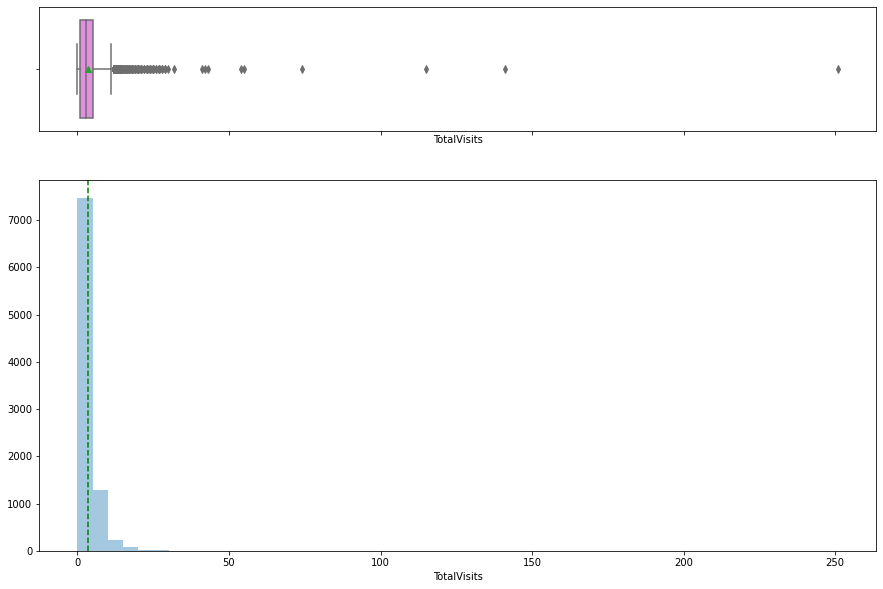

In [40]:
#Ploting the totalvists feature
box_hist(df.TotalVisits)

In [41]:
#getting the 5 Number summary
df.TotalVisits.describe().T

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

Observation:
* we observe a a left skew distribution due to small values concentration at the lower end of the scale
* we also observe some outliers which are going to be treated via the std scaler
* the mean, std dev and median can be seen above
* we would like to see how this feature associate with other features 


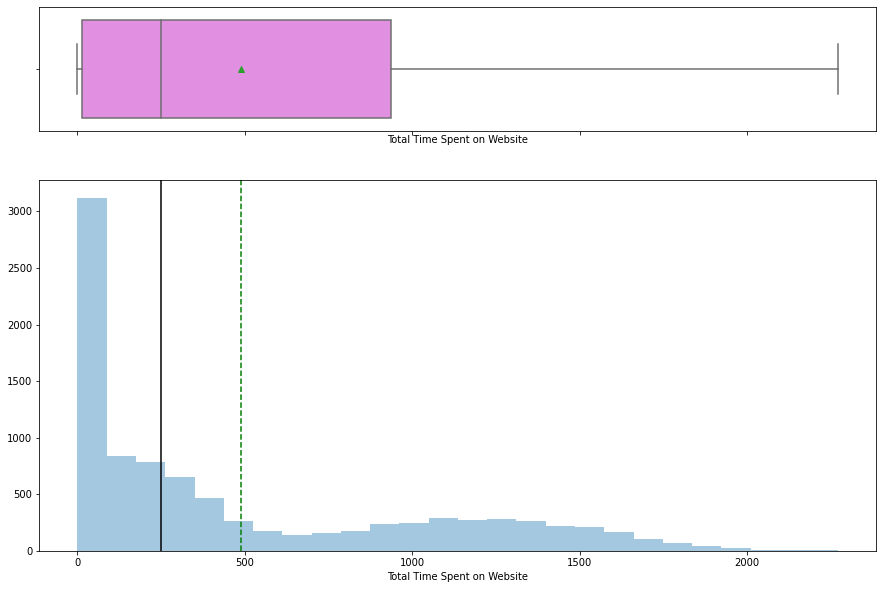

In [42]:
#plot the Total Time Spent on Website
box_hist(df['Total Time Spent on Website'])

In [43]:
#Ploting the 5 number summary
df['Total Time Spent on Website'].describe().T

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

Observation:
* we notice a left distribution due to small value concentration to the lower end of the scale
* No outliers observed
* the mean, median, and mean as above
* We note that the total time spent on the website is considerably variable 



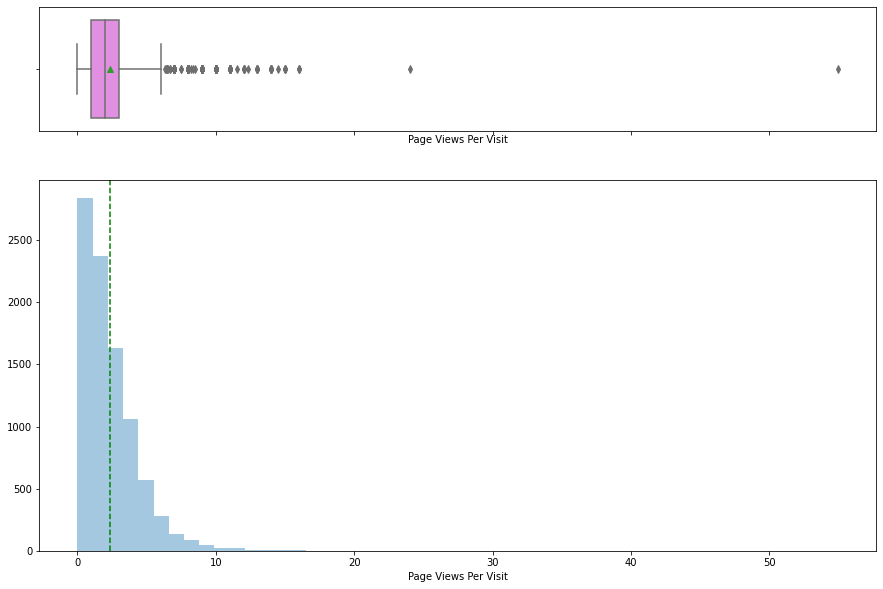

In [44]:
#Ploting Page Views Per Visit
box_hist(df['Page Views Per Visit'])

In [45]:
df['Page Views Per Visit'].describe().T

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

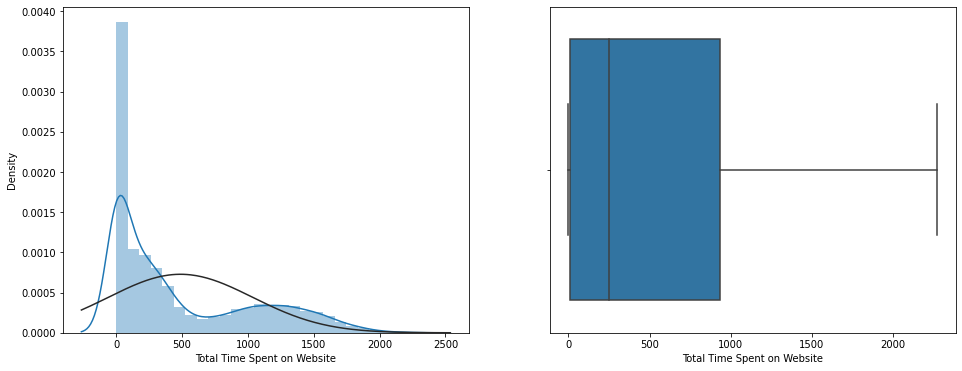

Skewness: 0.9564501929530472
Kurtosis: -0.4037697307931065
--------------------------------------
count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64


In [46]:
from scipy import stats
from scipy.stats import skew,norm  
f,ax = plt.subplots(1,2,figsize=(16,6))
sns.distplot(df['Total Time Spent on Website'],fit=norm,ax=ax[0])
sns.boxplot(df['Total Time Spent on Website'])
plt.show()

#skewness and kurtosis
print("Skewness: {}".format(df['Total Time Spent on Website'].skew()))
print("Kurtosis: {}".format(df['Total Time Spent on Website'].kurt()))
print("--------------------------------------")
print(df['Total Time Spent on Website'].describe())
## read platykurtic plots  
#kurtosis is flattening of curve 
# skewness is making curve taller skew upward

Observation:
* We also observe a left skewed distribution due to the majority low values distributed at the lower end of the sacle
* we also observe outliers to be treated via std scaler
* We can infer that the typical customers visits the site twice

### Bivariate Analysis 

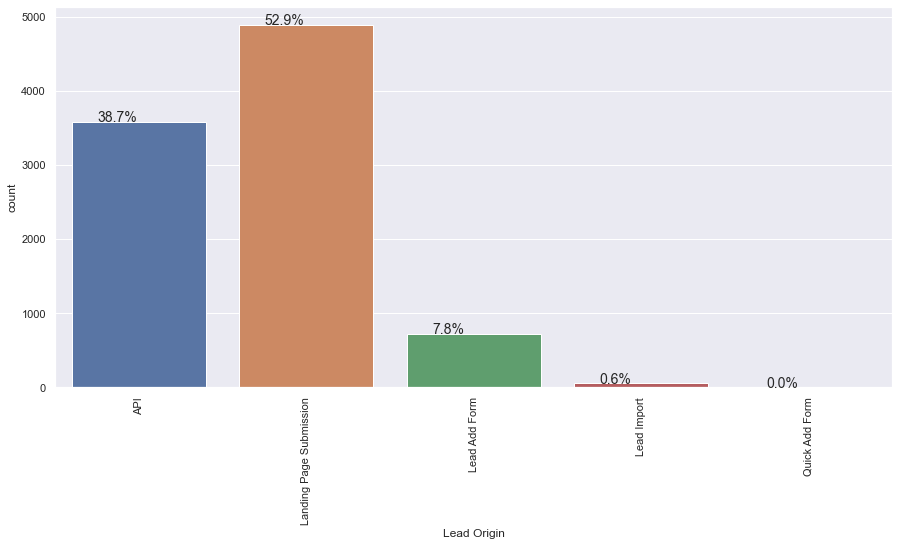

In [47]:
#Ploting lead origin
percentiled_bar(df['Lead Origin'])

* As per the above landing Page submission leads  by 52.9% followed by the rest
* we are keen to observe the interaction with the other features
* we will further perform one-hot-encoding via dummy varibles to convert features to nemrical

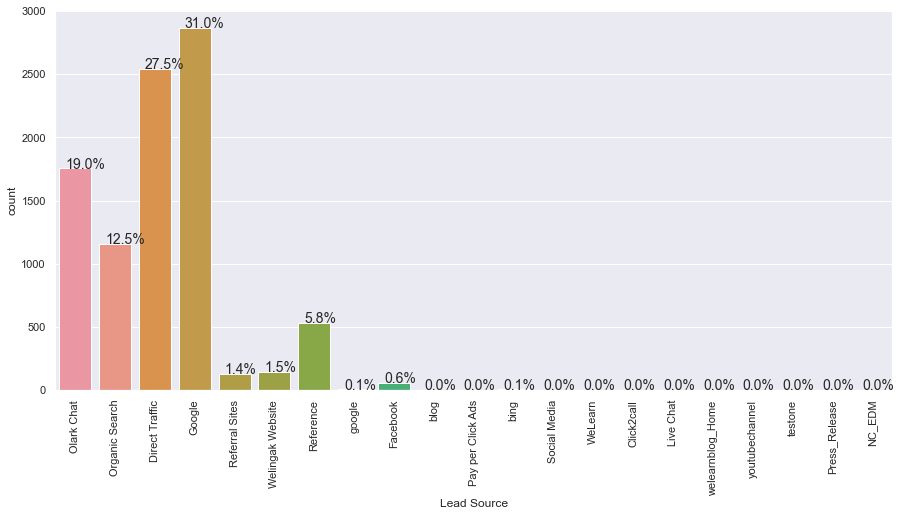

In [48]:
#Ploting Lead Source
percentiled_bar(df['Lead Source'])

* As per the above Google  leads by 31% followed by the rest
* we are keen to observe the interaction with the other features
* we will further perform one-hot-encoding via dummy varibles to convert features to nemrical

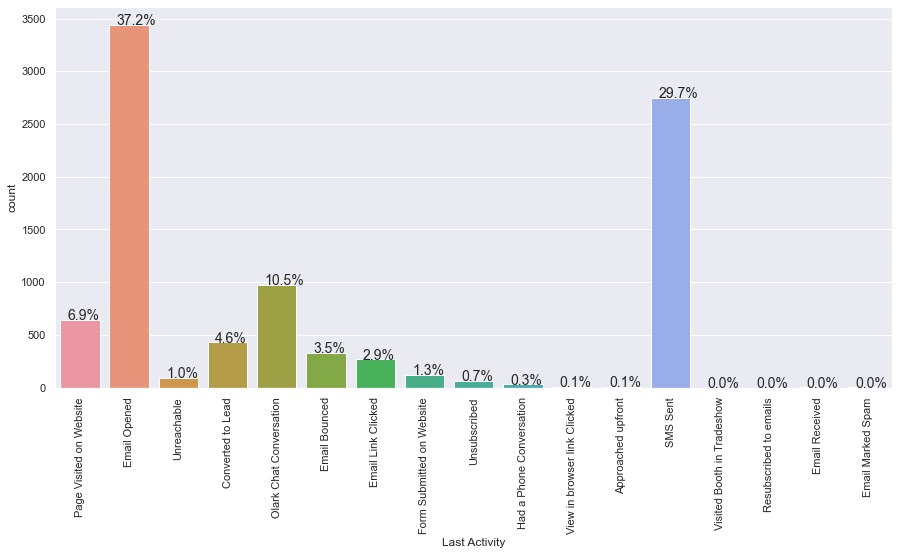

In [49]:
#Ploting Last activity
percentiled_bar(df['Last Activity'])

* As per the Email Opened  leads by 37.2% followed by the rest
* we are keen to observe the interaction with the other features
* we will further perform one-hot-encoding via dummy varibles to convert features to nemrical

In [50]:
#ploting Last Notable Activity
df['Last Notable Activity'].value_counts(normalize=True, ascending=False)*100


Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Form Submitted on Website        0.010823
View in browser link Clicked     0.010823
Resubscribed to emails           0.010823
Email Received                   0.010823
Approached upfront               0.010823
Name: Last Notable Activity, dtype: float64

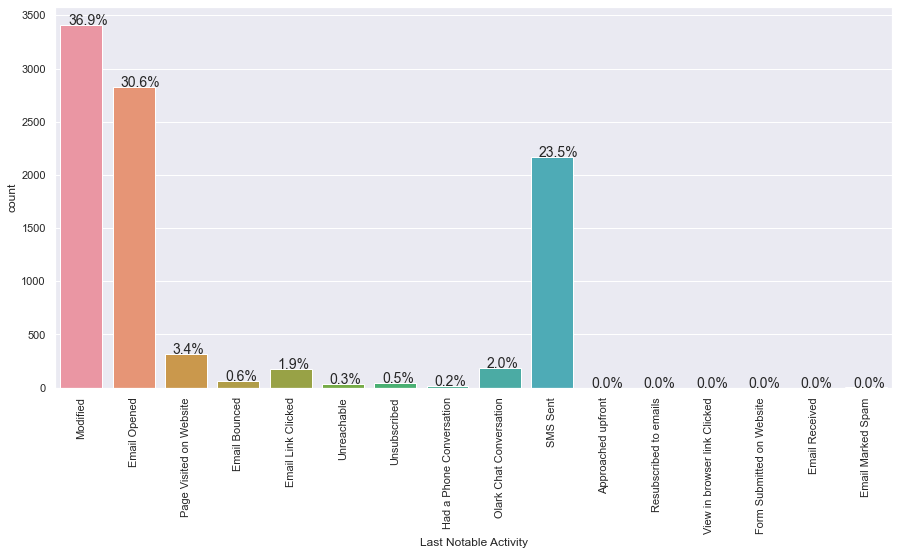

In [51]:
#Ploting Last Notable activity
percentiled_bar(df['Last Notable Activity'])

* Generally it can be said that it can be said that Last Activity vs Last Notable Acivity follow the same distribution
* As per the Modified  leads by 37.2% followed by the rest
* we are keen to observe the interaction with the other features
* we will proceed to drop Last Activity since knowing one describes the other.

### BiVariate analysis with target

In [52]:
## copying same lines of codes from above cells
def find_analysis_with_target(col_name):
    color = list('cmykb')
    plt.figure(figsize=[8,6])
    #print(leads_data.groupby(by =[col_name])['Converted'].mean()*100)
    plt.barh(df.groupby(by =[col_name])['Converted'].mean().index,df.groupby(by =[col_name])['Converted'].mean()*100,color=color)
    plt.show()
    

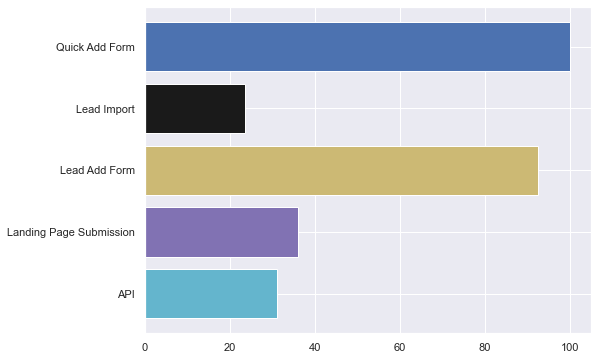

In [53]:
find_analysis_with_target('Lead Origin')

* We can observed that we lead origin is quick add form and lead add form there are higher chances of getting converted
* If lead source is Lead import then there are lower chances of getting converted

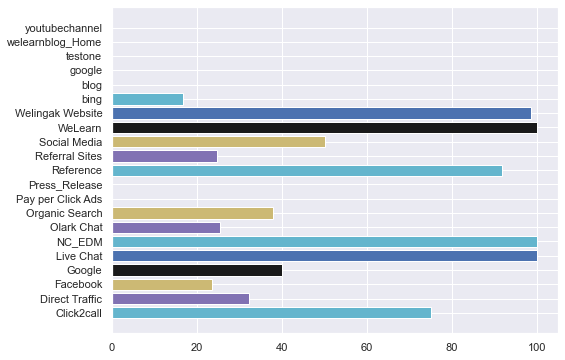

In [54]:
find_analysis_with_target('Lead Source')

* We observe that if Lead souce is Live chat and NC_EDM,Welearn,Welingak website then it has higher rate of conversion

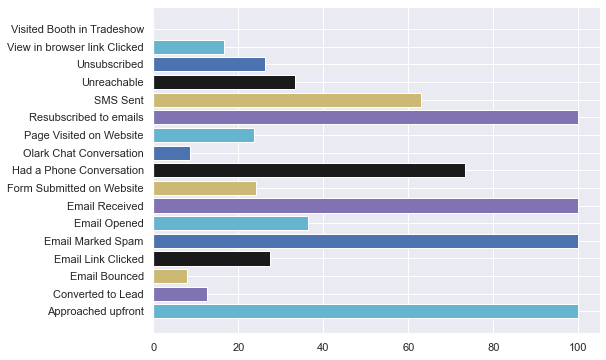

In [55]:
find_analysis_with_target('Last Activity')

* If learner is resubscribed then higher chances of getting converted
* If learner approached upfront then higher chances of geeting converted
* People with email bounces are very less to get converted

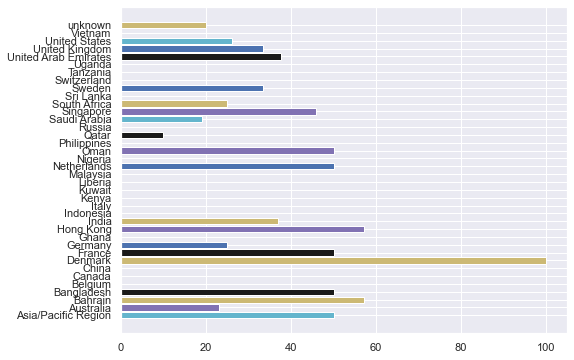

In [56]:
find_analysis_with_target('Country')

* Learners from Denmark and Hongkong have high rate of conversion

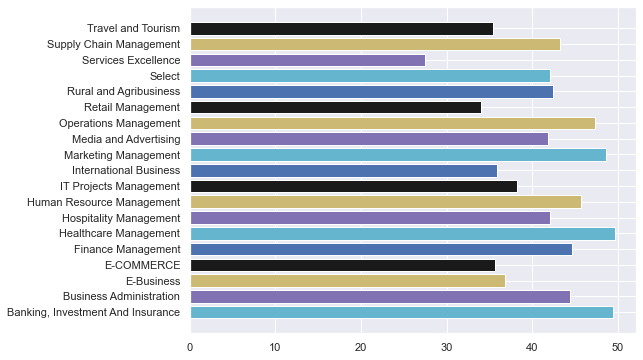

In [57]:

find_analysis_with_target('Specialization')

* Almost no impact of specilisation on target

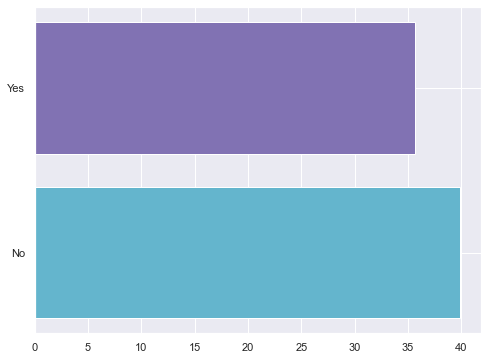

In [58]:
find_analysis_with_target('A free copy of Mastering The Interview')

In [59]:
#Checking Country distribution
df.Country.value_counts(normalize=True, ascending=False)*100


India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Nigeria                  0.059006
Canada                   0.059006
Germany                  0.059006
South Africa             0.059006
Kuwait                   0.059006
Sweden                   0.044254
Asia/Pacific Region      0.029503
Netherlands              0.029503
China                    0.029503
Belgium                  0.029503
Bangladesh               0.029503
Italy                    0.029503
Philippines              0.029503
Uganda                   0.029503
Ghana                    0.029503
Sri Lanka                0.014751
Tanzania      

Observation:
* 95% of the population is based at India with 1% at the USA
* We are going to proceed to drop this feature since it is baised towards India


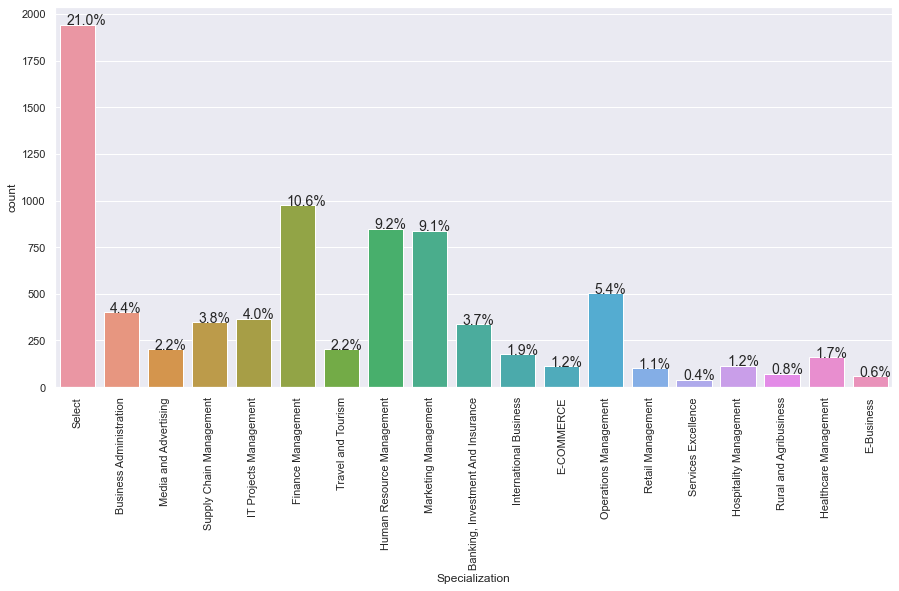

In [60]:
#Ploting Specialization
percentiled_bar(df['Specialization'])

* As per the Select  leads by 21% followed by the rest
* we are keen to observe the interaction with the other features
* we will further perform one-hot-encoding via dummy varibles to convert features to nemrical
* Does Select mean anything or is a default value when no other option is selected ?
* we will explore droping this option

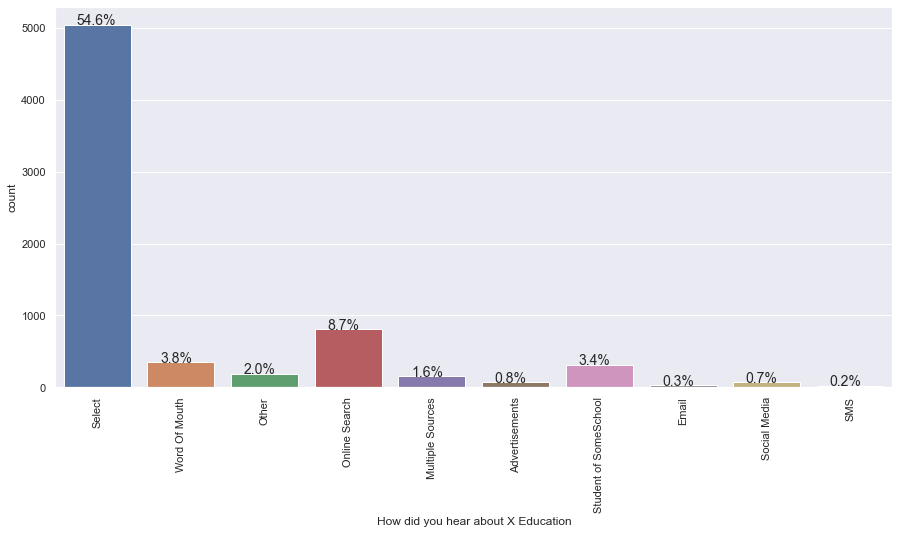

In [61]:
#Ploting How did you hear about X Education 
percentiled_bar(df['How did you hear about X Education'])

* As per the Select  leads by 54% followed by the rest
* we are keen to observe the interaction with the other features
* we will further perform one-hot-encoding via dummy varibles to convert features to nemrical
* Does Select mean anything or is a default value when no other option is selected ?

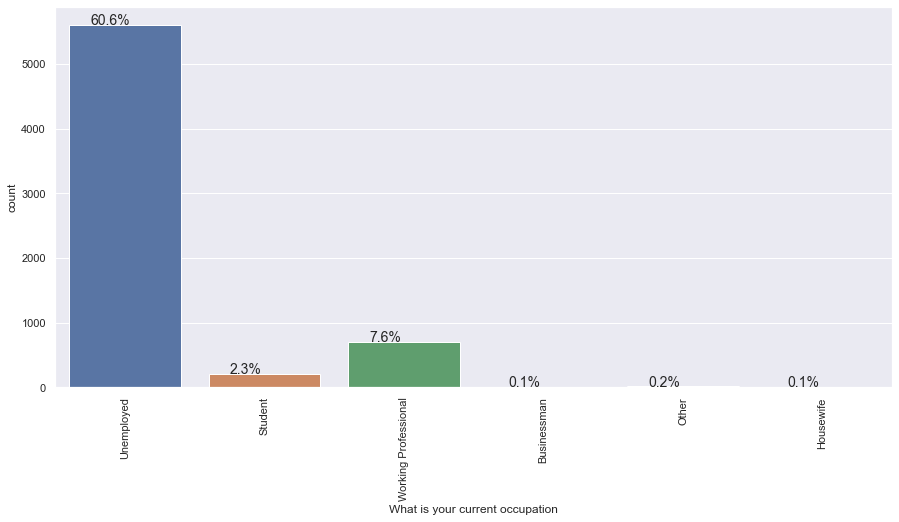

In [62]:
#Ploting What is your current occupation 
percentiled_bar(df['What is your current occupation'])

* As per the Unemployed  leads by 60.6% followed by the rest
* we are keen to observe the interaction with the other features
* we will further perform one-hot-encoding via dummy varibles to convert features to nemrical

In [63]:
#Checking What matters most to you in choosing a course
df['What matters most to you in choosing a course'].value_counts(normalize=True, ascending=False)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

* 99.9% of the respondent stated "better career prospects" indicating bias towards this option.
* we will proceed to drop this feature since we cannot derive any more analysis due to the bais

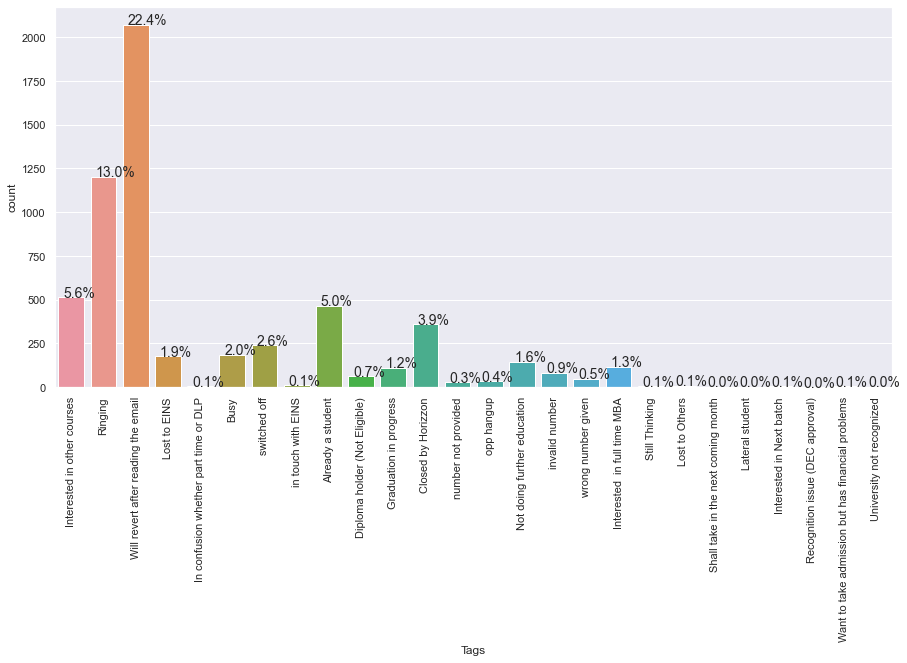

In [64]:
#Ploting Receive More Updates About Our Courses
percentiled_bar(df['Tags'])

* As per the Will revert after reading the email leads by 22.4% followed by the rest
* we are keen to observe the interaction with the other features
* we will further perform one-hot-encoding via dummy varibles to convert features to nemrical

In [65]:
#Ploting Lead Quality 
#percentiled_bar(df['Lead Quality'])
df['Lead Quality'].value_counts(normalize=True,ascending=False)*100

Might be             34.875922
Not Sure             24.413146
High in Relevance    14.241002
Worst                13.436173
Low in Relevance     13.033758
Name: Lead Quality, dtype: float64

* As per the Might be leads by 34.88% followed by the rest
* we are keen to observe the interaction with the other features
* we will further perform one-hot-encoding via dummy varibles to convert features to nemrical

In [66]:
#Checking Lead Quality 
#percentiled_bar(df['Lead Profile'])
df['Lead Profile'].value_counts(normalize=True,ascending=False)*100

Select                         63.481856
Potential Lead                 24.697596
Other Leads                     7.456745
Student of SomeSchool           3.690093
Lateral Student                 0.367478
Dual Specialization Student     0.306232
Name: Lead Profile, dtype: float64

* As per the Might be leads by 34.88% followed by the rest
* we are keen to observe the interaction with the other features
* we will further perform one-hot-encoding via dummy varibles to convert features to nemrical

In [67]:
#Checking City distribution
#percentiled_bar(df['City'])
df['City'].value_counts(normalize=True,ascending=False)*100

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

In [68]:
#We will continue to drop these features since distribution is baised one way
df.drop(columns=['Last Activity','Country', 'What matters most to you in choosing a course'],axis=1, inplace=True)
df.shape

(9240, 16)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Specialization                          7802 non-null   object 
 8   How did you hear about X Education      7033 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  Tags                                    5887 non-null   obje

### Data Types Conversion

In [70]:
#Converting
vars = ['Lead Origin', 'Lead Source', 'Last Notable Activity', 'Specialization','How did you hear about X Education',
           'What is your current occupation',
           'Tags','Lead Quality','Lead Profile','City','A free copy of Mastering The Interview']
for col in vars:
    df[col] = df[col].astype('category')

In [71]:
#Checking if conversion was made
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Lead Number                             9240 non-null   int64   
 1   Lead Origin                             9240 non-null   category
 2   Lead Source                             9204 non-null   category
 3   Converted                               9240 non-null   int64   
 4   TotalVisits                             9103 non-null   float64 
 5   Total Time Spent on Website             9240 non-null   int64   
 6   Page Views Per Visit                    9103 non-null   float64 
 7   Specialization                          7802 non-null   category
 8   How did you hear about X Education      7033 non-null   category
 9   What is your current occupation         6550 non-null   category
 10  Tags                                    5887 non

### Multivariate Analysis 



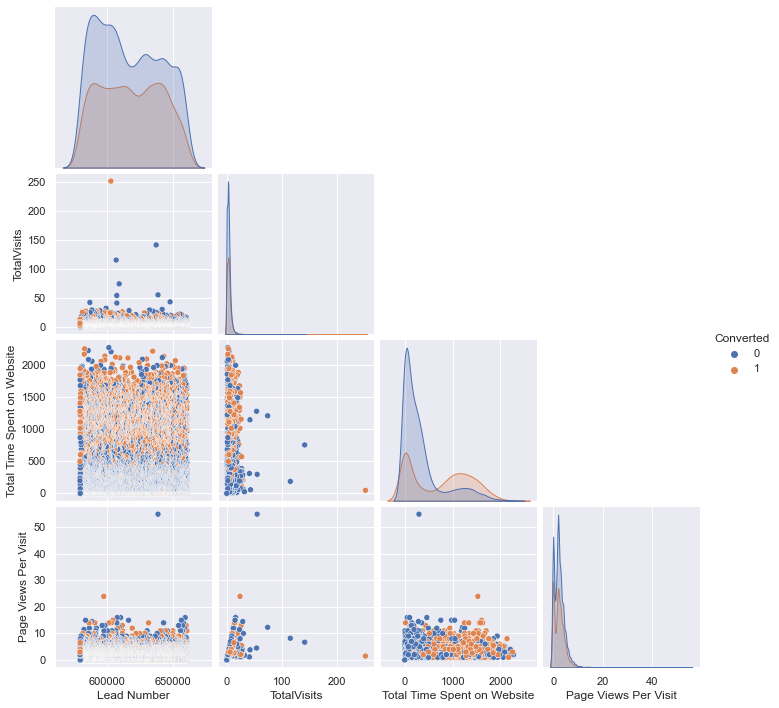

In [72]:
#PLot a pairpoint to show interaction
sns.pairplot(df, corner=True, kind='scatter', hue='Converted')
plt.show()

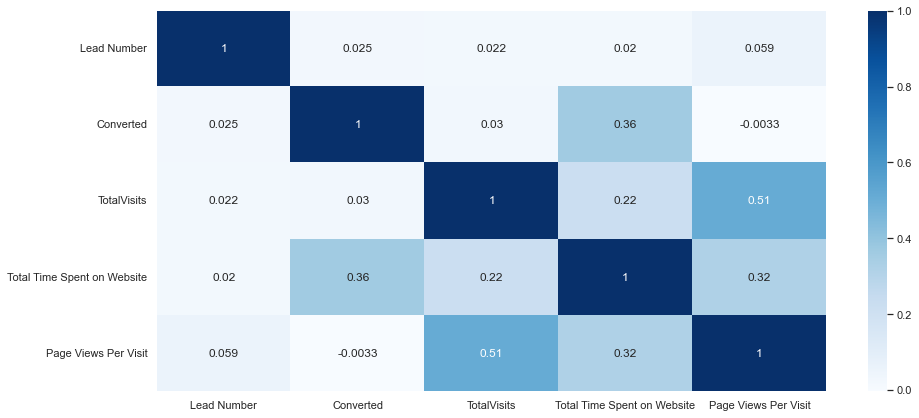

In [73]:
#Ploting a heatmap to identify correlations across features
sns.heatmap(df.corr(),annot=True, cmap="Blues")
plt.show()

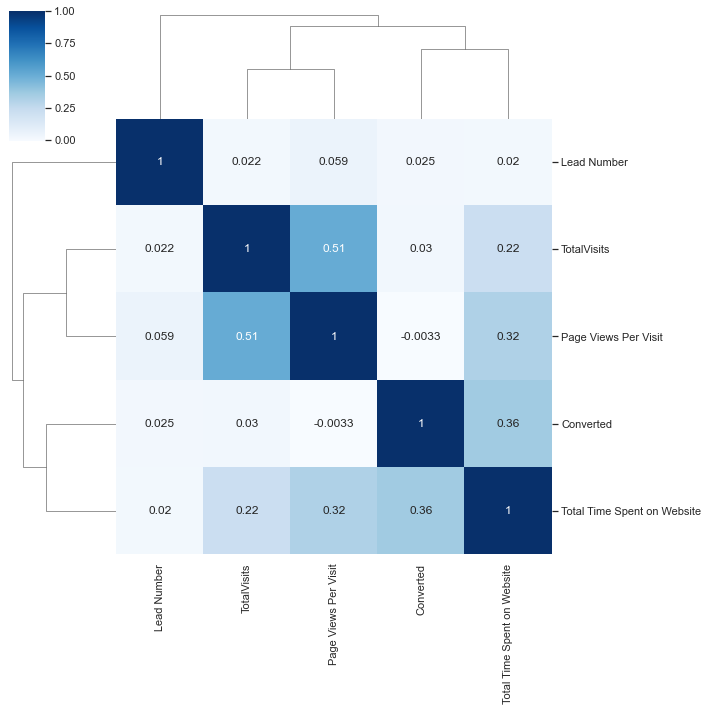

In [74]:
#Ploting a clsutermap correlation
sns.clustermap(df.corr(),annot=True, cmap="Blues")
plt.show()

###  Data Scaling 

In [75]:
df.dropna(inplace=True)
df.shape

(4327, 16)

### Create a Deep copy of the dataframe

In [76]:
lead =df.copy()
lead.columns
#deep copy was created with the same shape as the original dataframe

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

### Encoding via Dummy Variables 

* this is done to convert categorical features to numerical 

In [77]:
#Converting lead Origin
lead = pd.get_dummies(lead, columns=['Lead Origin'],drop_first=True)
#lead.head()

In [78]:
#Converting Lead Source
lead = pd.get_dummies(lead, columns=['Lead Source'],drop_first=True)
#lead.head()

In [79]:
#Converting Lead Source
lead = pd.get_dummies(lead, columns=['Last Notable Activity'],drop_first=True)
#lead.head()

In [80]:
#Converting Specialization
lead = pd.get_dummies(lead, columns=['Specialization'],drop_first=True)
#lead.head()

In [81]:
#Converting Specialization
lead = pd.get_dummies(lead, columns=['How did you hear about X Education'],drop_first=True)
#lead.head()

In [82]:
#Converting What is your current occupation
lead = pd.get_dummies(lead, columns=['What is your current occupation'],drop_first=True)
#lead.head()

In [83]:
#Converting Tags
lead = pd.get_dummies(lead, columns=['Tags'],drop_first=True)
#lead.head()

In [84]:
#Converting Lead Quality
lead = pd.get_dummies(lead, columns=['Lead Quality'],drop_first=True)
#lead.head()

In [85]:
#Converting Lead Profile
lead = pd.get_dummies(lead, columns=['Lead Profile'],drop_first=True)
#lead.head()

In [86]:
#Converting City
lead = pd.get_dummies(lead, columns=['City'],drop_first=True)
#lead.head()

In [87]:
#Converting A free copy of Mastering The Interview
lead = pd.get_dummies(lead, columns=['A free copy of Mastering The Interview'],drop_first=True)
#lead.head()


In [88]:
#Checkding the shape of the new dataframe
lead.shape

(4327, 117)

### Data Preparation

In [89]:
X = lead.drop(['Converted','Lead Number'], axis=1)
Y = lead[['Converted']] 


#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

X.shape

(4327, 115)

In [91]:
# Scaling of numerical values via minmax scaler
df_vars = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

#importing MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[df_vars] = scaler.fit_transform(X_train[df_vars])
X_test[df_vars] = scaler.transform(X_test[df_vars])

 

### Building the model
### Model evaluation criterion
### Model can make wrong predictions as:
* Predicting a customer will tbe converted while the customer is not converted - Loss of opportunity
* Predicting a customer will not be converted  and the customer be converted - Loss of resources

### Which case is more important?
*Predicting a customer will convert and the customer not convert
### How to reduce this loss i.e need to reduce False Negatives?
We need to maximize on Recall or F1 score, the focus should be on increasing Recall or minimizing the false negatives.

### Creating a User Define function to get model metrics

In [92]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score2(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(train_y,pred_train)
    test_acc = accuracy_score(test_y,pred_test)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("ROC-AUC Score on training set:",metrics.roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set:",metrics.roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [93]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score1(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(train_y,pred_train)
    test_acc = accuracy_score(test_y,pred_test)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
   # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
    return score_list # returning the list with train and test scoresbb

In [94]:
## Defining a function for better visualization of confusion matrix
def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_predict,y_actual, labels=[1, 0])
    data_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['1','0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(data_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [95]:
#Multicolliearity check
# dataframe with numerical column only
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)


In [96]:
#VIF before 
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                                                       11708.253505
TotalVisits                                                     1.373862
Total Time Spent on Website                                     1.556322
Page Views Per Visit                                            1.983688
Lead Origin_Landing Page Submission                             5.124179
Lead Origin_Lead Add Form                                     408.525302
Lead Origin_Lead Import                                        13.271557
Lead Origin_Quick Add Form                                           NaN
Lead Source_Direct Traffic                                   1338.081398
Lead Source_Facebook                                           31.720389
Lead Source_Google                                           1347.472994
Lead Source_Live Chat                                           1.730339
Lead Source_NC_EDM                                                   NaN
Lead Source_Olar

#### Found many columns with high VIF , lets check accuracy and then decide to drop or not

In [121]:
#initializing our GLM  model via statsmodel
glm = sm.GLM(y_train, X_train.astype(float))
lg = glm.fit()

print(lg.summary())

print('')
# Let's check model performances for this model
scores_LR = get_metrics_score1(lg,X_train,X_test,y_train,y_test,flag=True)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3028
Model:                            GLM   Df Residuals:                     2926
Model Family:                Gaussian   Df Model:                          101
Link Function:               identity   Scale:                        0.031033
Method:                          IRLS   Log-Likelihood:                 1013.0
Date:                Mon, 14 Mar 2022   Deviance:                       90.801
Time:                        22:24:12   Pearson chi2:                     90.8
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

#### Noted that Very high accuracy rate using GLM

In [123]:
#Importing the classical logit classifier
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [124]:
#Using RFE to do feature selction
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [125]:
#getting top feature 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 47),
 ('Total Time Spent on Website', False, 7),
 ('Page Views Per Visit', False, 46),
 ('Lead Origin_Landing Page Submission', False, 72),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('Lead Origin_Quick Add Form', False, 92),
 ('Lead Source_Direct Traffic', False, 38),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 43),
 ('Lead Source_Live Chat', False, 79),
 ('Lead Source_NC_EDM', False, 91),
 ('Lead Source_Olark Chat', False, 11),
 ('Lead Source_Organic Search', False, 56),
 ('Lead Source_Pay per Click Ads', False, 89),
 ('Lead Source_Press_Release', False, 88),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Social Media', False, 78),
 ('Lead Source_WeLearn', False, 83),
 ('Lead Source_Welingak Website', False, 35),
 ('Lead Source_bing', False, 100),
 ('Lead Source_blog', False, 101),
 ('Lead Source_google', False, 99),
 ('Lead Source_testone', False

In [126]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone', 'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Marked Spam', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Email Received', 'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conv

In [137]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3028
Model:                            GLM   Df Residuals:                     3012
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -382.45
Date:                Mon, 14 Mar 2022   Deviance:                       764.90
Time:                        22:34:46   Pearson chi2:                 2.43e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2031      0.262     -8.400      0.000      -2.717      -1.689
Lead Origin_Lead Add Form                    0.9844      0.636      1.547      0.122      -0.263       2.231
Last Notable Activity_SMS Sent               1.2350      0.241      5.127      0.000       0.763       1.707
Tags_Busy                                    2.0126      0.331      6.079      0.000       1.364       2.661
Tags_Closed by Horizzon                      7.0450      1.047      6.726      0.000       4.992       9.098
Tags_Interested in other courses            -1.0297      0.525     -1.962      0.050      -2.058      -0.001
Tags_Lateral student                        27.0723   1.45e+05      0.000      1.000   -2.84e+05    2.84e+05
Tags_Lost to EINS                            5.9926      0.776      7.722      0.000       4.472       7.514
Tags_Not doing further education           -22.1820    2.2e+04     -0.001      0.999   -4.32e+04    4.31e+04
Tags_Ringing                                -1.6802      0.384     -4.372      0.000      -2.433      -0.927
Tags_Will revert after reading the email     5.5760      0.320     17.432      0.000       4.949       6.203
Tags_invalid number                        -23.4353   3.51e+04     -0.001      0.999   -6.89e+04    6.89e+04
Tags_number not provided                   -23.8777   5.56e+04     -0.000      1.000   -1.09e+05    1.09e+05
Tags_switched off                           -3.2107      1.049     -3.060      0.002      -5.267      -1.154
Tags_wrong number given                    -23.6172   4.06e+04     -0.001      1.000   -7.95e+04    7.95e+04
Lead Quality_Worst                          -3.0871      0.673     -4.590      0.000      -4.405      -1.769
============================================================================================================
"""

In [141]:
y_train_pred = res.predict(X_train_sm).values

In [142]:
#Checking the shape y_train_pred
y_train_pred.shape

(3028,)

In [143]:
#Checking the shape y_train
y_train.shape

(3028, 1)

In [150]:
#Get top  5 rows

y_train.head()

,Converted
7665,0
2208,1
7948,0
6402,0
4408,0


In [146]:
y_train_pred = y_train_pred.reshape(-1,1)

In [152]:
y_train_pred

array([[5.01533384e-03],
       [9.66847867e-01],
       [1.17209449e-12],
       ...,
       [9.66847867e-01],
       [6.60946854e-02],
       [4.43488537e-03]])

In [155]:
y_train['pred_prob'] = y_train_pred

In [158]:
#Threshold defintion
y_train['predicted'] = y_train.pred_prob.map(lambda x: 1 if x > 0.5 else 0)

In [159]:
y_train_pred.shape

(3028, 1)

In [161]:
y_train.head()

,Converted,pred_prob,predicted
7665,0,5.015334e-03,0
2208,1,9.668479e-01,1
7948,0,1.172094e-12,0
6402,0,5.015334e-03,0
4408,0,1.508556e-02,0


In [163]:
print(metrics.accuracy_score(y_train['Converted'], y_train['predicted']))

0.9547556142668429


## Metrics  

In [165]:
#Initializing object to create confusion matrix
confusion = metrics.confusion_matrix(y_train['Converted'], y_train['predicted'] )
confusion

array([[1254,   60],
       [  77, 1637]], dtype=int64)

In [166]:
#Confusion matrix calculator definition
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [167]:
#Calculating the Recall score
TP / float(TP+FN)

0.955075845974329

In [168]:
# Let us calculate specificity
TN / float(TN+FP)

0.954337899543379

### ROC Curve

In [169]:
## User defined function to plot ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [170]:
fpr, tpr, thresholds = metrics.roc_curve( y_train['Converted'],  y_train['predicted'], drop_intermediate = False )

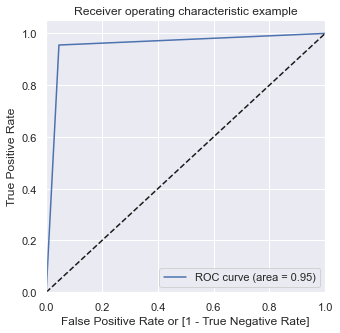

In [171]:
#Ploting ROC curve
draw_roc(y_train['Converted'],  y_train['predicted'])

#### Further using Pipelines

In [114]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))
    

LR: 96.20888957086594
DTREE: 94.92523826573235


* All our model are producing a cross validation recall score higher that 95% - meaning that we have very good models


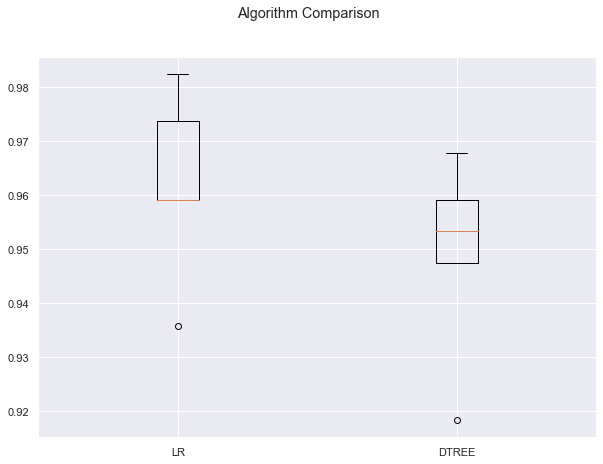

In [105]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### Conclusion and Recommendation


#### Top 3 Features based on RFE leading  to increase the probability of lead conversion?
* Lead Origin_Lead Add Form
* Last Notable Activity_SMS Sent
* Tags_Busy
#### Top 3 categorical leading  to increase the probability of lead conversion?
* Lead Origin Analysis
* Lead Source Analysis
* Country


We recommend the following strategy in order to maximize higher conversion rate:
* Country/Cities: Denmark and Hong Kong have a higher conversion rate thought the volumes may be lower compared to India
* Subscription: learners that have opted to subscribe and/or have been approached upfront have a higher conversion rate.
* Lead Source: Live chat and NC_EDM,Welearn, Welingak website then it has higher rate of conversion.
* Lead origin: is quick add form and lead add form there are higher chances of getting converted

In order to reach new audience  where high conversion rate we recommend the following strategy:
    
* Country/Cities: India, US and other countries/cities  may be explored  especially India given the large volumes
* Subscription: efforts to encourage peotential students to subscribe may lead to future conversion.
* Lead origin: If lead source is Lead import then there are lower chances of getting converted.